/home/user/fl-tesi/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


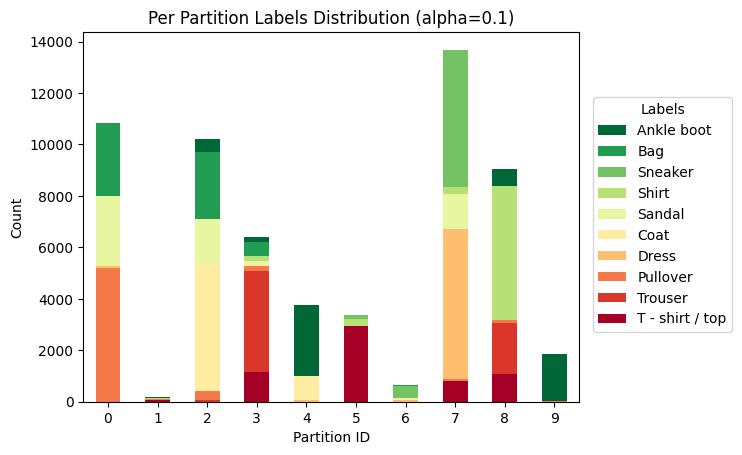

In [1]:
import os
import warnings
from flwr_datasets import FederatedDataset
from flwr_datasets.partitioner import DirichletPartitioner
from flwr_datasets.visualization import plot_label_distributions

output_dir = "img_output"
os.makedirs(output_dir, exist_ok=True)

warnings.filterwarnings("ignore")

fds = FederatedDataset(
    dataset="zalando-datasets/fashion_mnist",
    partitioners={
        "train": DirichletPartitioner(
            num_partitions=10,
            partition_by="label",
            alpha=0.1,
            seed=48,
        ),
    },
)

partitioner = fds.partitioners["train"]

fig, ax, df = plot_label_distributions(
    partitioner,
    label_name="label",
    plot_type="bar",
    size_unit="absolute",
    partition_id_axis="x",
    legend=True,
    verbose_labels=True,
    title="Per Partition Labels Distribution (alpha=0.1)",
)

output_path = os.path.join(output_dir, "distribution_dirichlet_01.pdf")
fig.savefig(output_path, format='pdf', bbox_inches='tight')

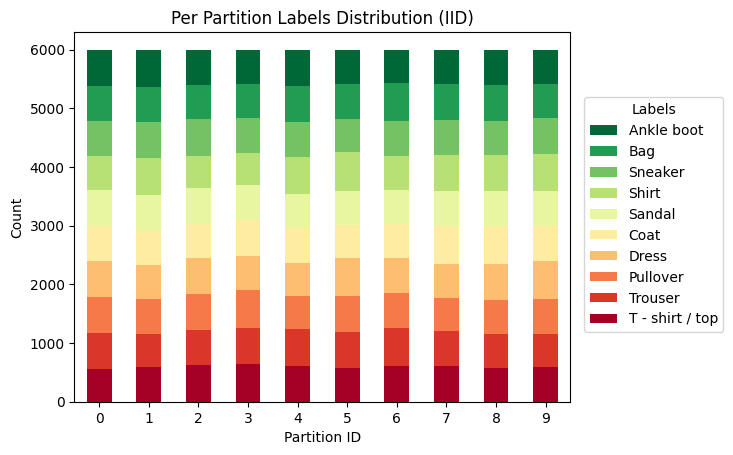

In [2]:
import os
from flwr_datasets import FederatedDataset
from flwr_datasets.partitioner import IidPartitioner
from flwr_datasets.visualization import plot_label_distributions

output_dir = "img_output"
os.makedirs(output_dir, exist_ok=True)

fds = FederatedDataset(
    dataset="zalando-datasets/fashion_mnist",
    partitioners={
        "train": IidPartitioner(
            num_partitions=10,
        ),
    },
)

partitioner = fds.partitioners["train"]

fig, ax, df = plot_label_distributions(
    partitioner,
    label_name="label",
    plot_type="bar",
    size_unit="absolute",
    partition_id_axis="x",
    legend=True,
    verbose_labels=True,
    title="Per Partition Labels Distribution (IID)",
)

output_path = os.path.join(output_dir, "distribution_iid.pdf")
fig.savefig(output_path, format='pdf', bbox_inches='tight')